# Market Basket Analysis

## HTML Customization

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    horizontal-align: middle;
}
h1,h2 {
    text-align: center;
    background-color: black;
    padding: 20px;
    margin: 0;
    color: yellow;
    font-family: ariel;
    border-radius: 80px
}

h3 {
    text-align: center;
    border-style: solid;
    border-width: 3px;
    padding: 12px;
    margin: 0;
    color: black;
    font-family: ariel;
    border-radius: 80px;
    border-color: gold;
}

body, p {
    font-family: ariel;
    font-size: 15px;
    color: charcoal;
}
div {
    font-size: 14px;
    margin: 0;

}

h4 {
    padding: 0px;
    margin: 0;
    font-family: ariel;
    color: purple;
}
</style>
""")

## Workflow

1. Import Packages
2. Loading dataset
3. Data Pre-Processing
4. Performing Exploratory Data Analysis
5. Apriori Implementation
6. Result Customization

## Import Packages

In [7]:
pip install apyori

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=746ef9e3b4999a70d99965e039c56e88b9f8c6cdd89dcdc15e5b4664df5edd16
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\84\45\a4\8ade6576f75410d8162c6da1de0aa9df56c16c711acab5a813
Successfully built apyori
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np # linear algebra
import pandas as pd # Data pre-processing
import seaborn as sns # Required for plotting
import matplotlib.pyplot as plt # Required for plotting

## Loading Dataset

In [202]:
df = pd.read_csv("Online_Retail.csv")
df.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0  536365    85123A    WHITE HANGING HEART T-LIGHT HOLDER   6          
1  536365    71053     WHITE METAL LANTERN                  6          
2  536365    84406B    CREAM CUPID HEARTS COAT HANGER       8          
3  536365    84029G    KNITTED UNION FLAG HOT WATER BOTTLE  6          
4  536365    84029E    RED WOOLLY HOTTIE WHITE HEART.       6          
5  536365    22752     SET 7 BABUSHKA NESTING BOXES         2          
6  536365    21730     GLASS STAR FROSTED T-LIGHT HOLDER    6          
7  536366    22633     HAND WARMER UNION JACK               6          
8  536366    22632     HAND WARMER RED POLKA DOT            6          
9  536367    84879     ASSORTED COLOUR BIRD ORNAMENT        32         

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00  2.55       17850.0     United Kingdom  
1  2010-12-01 08:26:00  3.39       17850.0     United Kingdom  
2  2010-12-01 08:26:00  2.75       17850.0     United Kingdom  
3  2010-12-01 08:26:00  3.39       17850.0     United Kingdom  
4  2010-12-01 08:26:00  3.39       17850.0     United Kingdom  
5  2010-12-01 08:26:00  7.65       17850.0     United Kingdom  
6  2010-12-01 08:26:00  4.25       17850.0     United Kingdom  
7  2010-12-01 08:28:00  1.85       17850.0     United Kingdom  
8  2010-12-01 08:28:00  1.85       17850.0     United Kingdom  
9  2010-12-01 08:34:00  1.69       13047.0     United Kingdom

In [11]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     133600
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

## Data Pre-Processing

In [18]:
df[['CustomerID']] = df[['CustomerID']].apply(pd.to_numeric)

In [19]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [20]:
df.info() # Checking data type information for validation purposes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495478 entries, 0 to 495477
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    495478 non-null  object        
 1   StockCode    495478 non-null  object        
 2   Description  494024 non-null  object        
 3   Quantity     495478 non-null  int64         
 4   InvoiceDate  495478 non-null  datetime64[ns]
 5   UnitPrice    495478 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      495478 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 30.2+ MB


## Performing Exploratory Data Analysis

In [23]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total Number of Items Sold')]

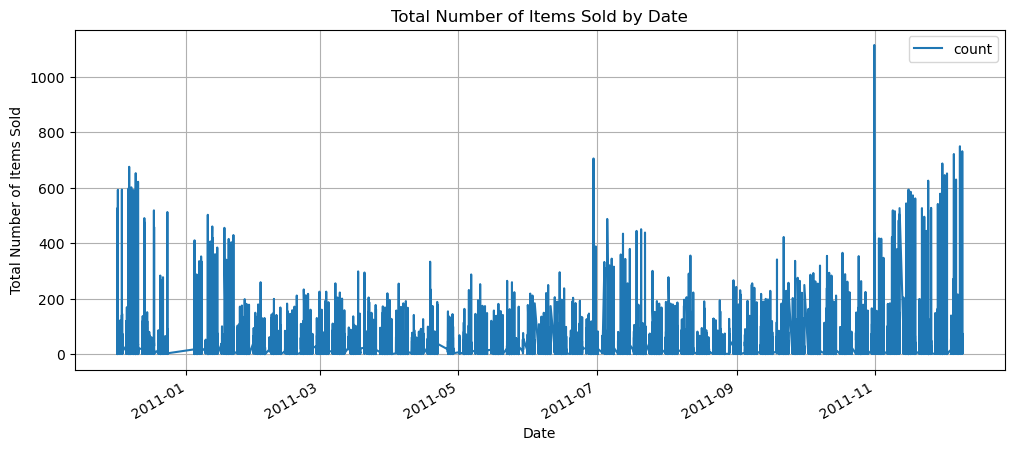

In [26]:
df.groupby(['InvoiceDate'])['Description'].agg(['count']).plot(figsize=(12,5), grid=True, title="Total Number of Items Sold by Date").set(xlabel="Date", ylabel="Total Number of Items Sold")

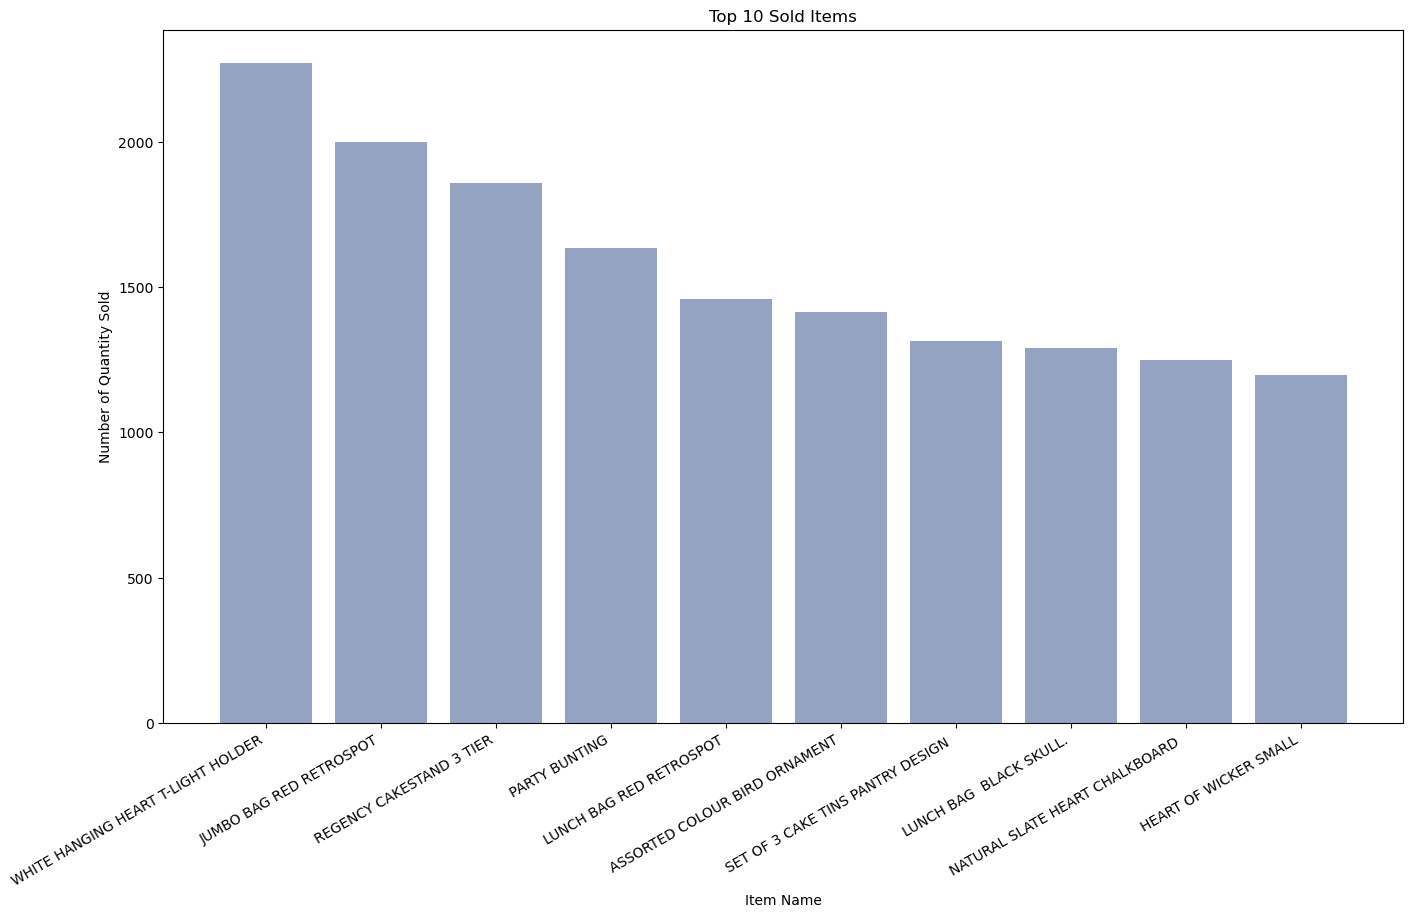

In [41]:
## Creating distribution of Item Sold
Item_distr = df.groupby(by = "Description").size().reset_index(name='Frequency').sort_values(by = 'Frequency',ascending=False).head(10)

## Declaring variables

bars = Item_distr["Description"]
height = Item_distr["Frequency"]
x_pos = np.arange(len(bars))

## Defining Figure Size

plt.figure(figsize=(16,9))

# Create bars
ax= plt.subplot() # to use in overlapping function
plt.bar(x_pos, height, color=(0.3, 0.4, 0.6, 0.6))

# Add title and axis names
plt.title("Top 10 Sold Items")
plt.xlabel("Item Name")
plt.ylabel("Number of Quantity Sold")

# Create names on the x-axis
plt.xticks(x_pos, bars)

# Function to avoid overlapping
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

# Show graph
plt.show()

In [197]:
# Month-Year Sales
df_date=df.set_index(['InvoiceDate']) ## Setting date as index for plotting purpose
df_date.head()

InvoiceNo StockCode                          Description  \
InvoiceDate                                                                    
2010-12-01 08:26:00  536365    85123A    WHITE HANGING HEART T-LIGHT HOLDER    
2010-12-01 08:26:00  536365    71053     WHITE METAL LANTERN                   
2010-12-01 08:26:00  536365    84406B    CREAM CUPID HEARTS COAT HANGER        
2010-12-01 08:26:00  536365    84029G    KNITTED UNION FLAG HOT WATER BOTTLE   
2010-12-01 08:26:00  536365    84029E    RED WOOLLY HOTTIE WHITE HEART.        

                     Quantity  UnitPrice  CustomerID         Country  
InvoiceDate                                                           
2010-12-01 08:26:00  6         2.55       17850.0     United Kingdom  
2010-12-01 08:26:00  6         3.39       17850.0     United Kingdom  
2010-12-01 08:26:00  8         2.75       17850.0     United Kingdom  
2010-12-01 08:26:00  6         3.39       17850.0     United Kingdom  
2010-12-01 08:26:00  6         3.39       17850.0     United Kingdom

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total Number of Items Sold')]

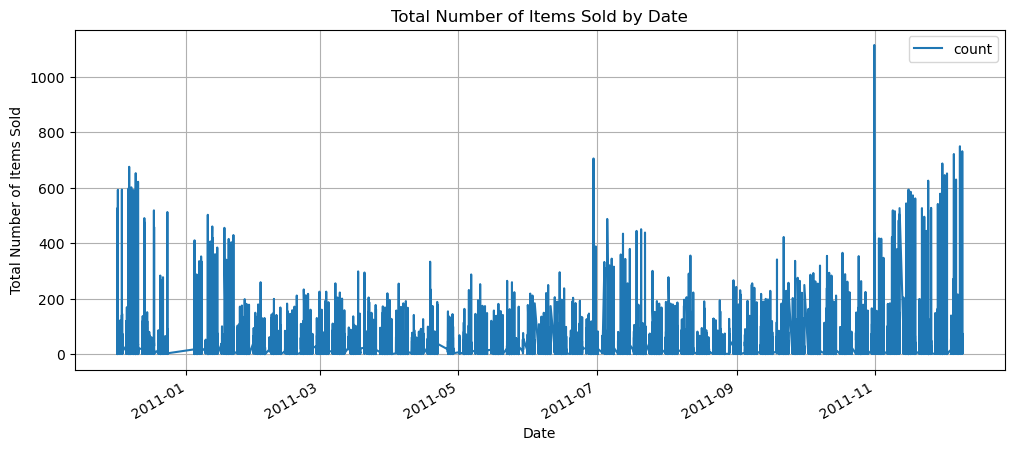

In [44]:
df_date.groupby(['InvoiceDate'])['Description'].agg(['count']).plot(figsize=(12,5), grid=True, 
            title="Total Number of Items Sold by Date").set(xlabel="Date", ylabel="Total Number of Items Sold")

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Number of Items Sold')]

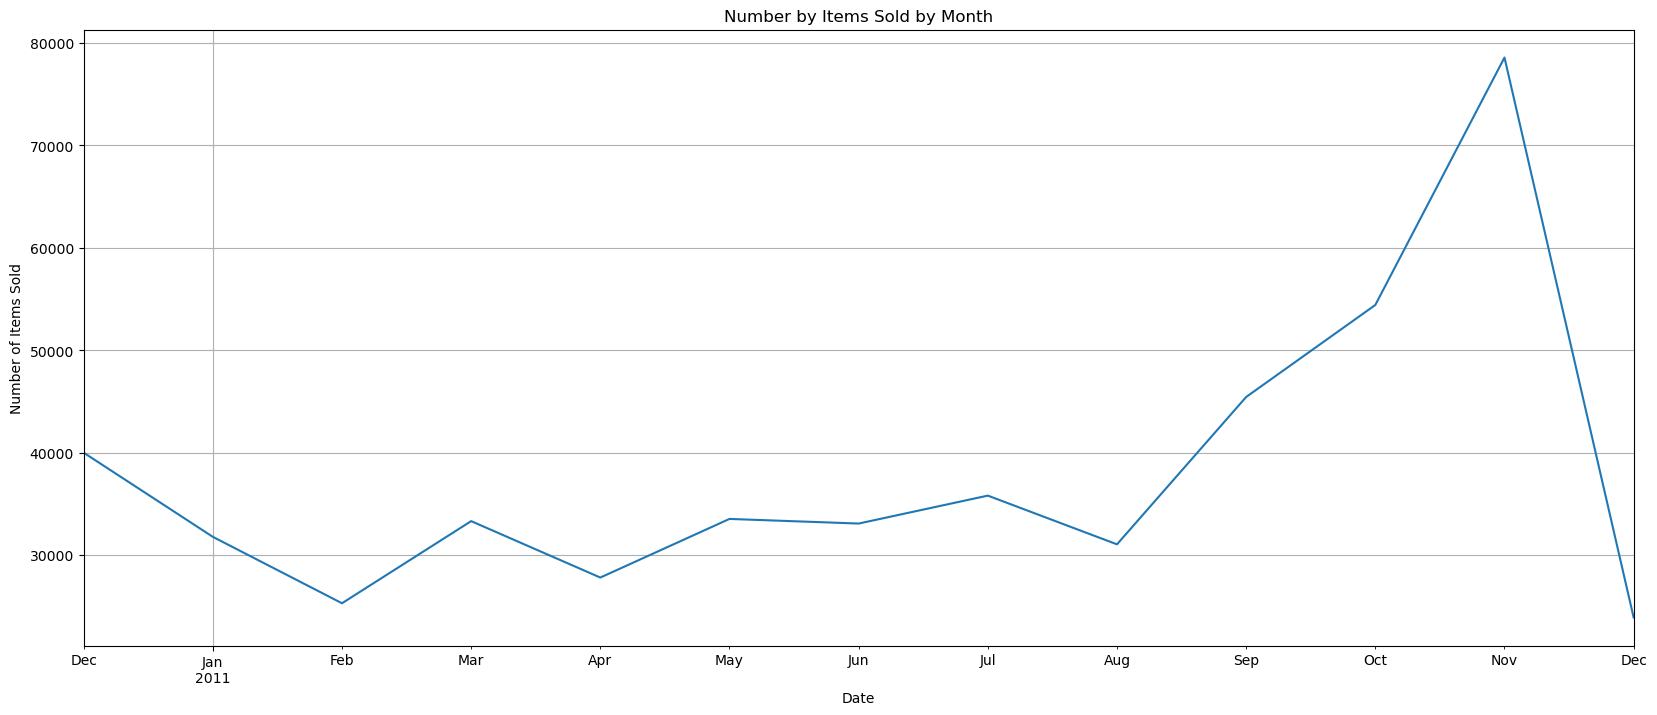

In [45]:
df_date.resample("M")['Description'].count().plot(figsize = (20,8), grid = True, 
                title = "Number by Items Sold by Month").set(xlabel = "Date", ylabel = "Number of Items Sold")

In [58]:
df_date["Hour"] = df_date.index.hour
df_date["Weekday"] = df_date.index.weekday + 1

df_date.head(10)

InvoiceNo StockCode                          Description  \
InvoiceDate                                                                    
2010-12-01 08:26:00    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
2010-12-01 08:26:00    536365     71053                  WHITE METAL LANTERN   
2010-12-01 08:26:00    536365    84406B       CREAM CUPID HEARTS COAT HANGER   
2010-12-01 08:26:00    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
2010-12-01 08:26:00    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   
2010-12-01 08:26:00    536365     22752         SET 7 BABUSHKA NESTING BOXES   
2010-12-01 08:26:00    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER   
2010-12-01 08:28:00    536366     22633               HAND WARMER UNION JACK   
2010-12-01 08:28:00    536366     22632            HAND WARMER RED POLKA DOT   
2010-12-01 08:34:00    536367     84879        ASSORTED COLOUR BIRD ORNAMENT   

                     Quantity  UnitPrice  CustomerID         Country  Hour  \
InvoiceDate                                                                  
2010-12-01 08:26:00         6       2.55     17850.0  United Kingdom     8   
2010-12-01 08:26:00         6       3.39     17850.0  United Kingdom     8   
2010-12-01 08:26:00         8       2.75     17850.0  United Kingdom     8   
2010-12-01 08:26:00         6       3.39     17850.0  United Kingdom     8   
2010-12-01 08:26:00         6       3.39     17850.0  United Kingdom     8   
2010-12-01 08:26:00         2       7.65     17850.0  United Kingdom     8   
2010-12-01 08:26:00         6       4.25     17850.0  United Kingdom     8   
2010-12-01 08:28:00         6       1.85     17850.0  United Kingdom     8   
2010-12-01 08:28:00         6       1.85     17850.0  United Kingdom     8   
2010-12-01 08:34:00        32       1.69     13047.0  United Kingdom     8   

                     Weekday  
InvoiceDate                   
2010-12-01 08:26:00        3  
2010-12-01 08:26:00        3  
2010-12-01 08:26:00        3  
2010-12-01 08:26:00        3  
2010-12-01 08:26:00        3  
2010-12-01 08:26:00        3  
2010-12-01 08:26:00        3  
2010-12-01 08:28:00        3  
2010-12-01 08:28:00        3  
2010-12-01 08:34:00        3

In [60]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2271
JUMBO BAG RED RETROSPOT                2001
REGENCY CAKESTAND 3 TIER               1859
PARTY BUNTING                          1634
LUNCH BAG RED RETROSPOT                1460
                                       ... 
MIA                                       1
PINK CRYSTAL GUITAR PHONE CHARM           1
showroom                                  1
TRAVEL CARD WALLET DOTCOMGIFTSHOP         1
ORANGE PENDANT TRIPLE SHELL NECKLAC       1
Name: Description, Length: 4202, dtype: int64

In [192]:
#df['Description'].nunique() # There are 3950 buyers represented by their ID
#df['Description'].value_counts().nlargest(20) # Showing the mode but in the list
#Sorting top 20 items
df_top20 = df.groupby(by = "Description").size().reset_index(name='Frequency').sort_values(by = 'Frequency',ascending=False).head(20)
df_top20.head()

Description  Frequency
3898  WHITE HANGING HEART T-LIGHT HOLDER  2271     
1858  JUMBO BAG RED RETROSPOT             2001     
2899  REGENCY CAKESTAND 3 TIER            1859     
2460  PARTY BUNTING                       1634     
2045  LUNCH BAG RED RETROSPOT             1460

In [64]:
import plotly.express as px

In [93]:
fig = px.bar(df,
       x = df_top20['Description'], 
       y = df_top20['Frequency'],
       color= df_top20['Description'] )
    
fig.update_layout(
xaxis_title= 'Description',
yaxis_title="Count",
legend_title= 'Description',
font_family="Courier New",
font_color="blue",
title_font_family="Times New Roman",
title_font_color="red",
legend_title_font_color="green")

    
fig.show()

In [159]:
df_2 = df.groupby(['CustomerID','InvoiceDate'])['Description'].apply(sum)

In [164]:
transactions = [a[1]['Description'].tolist() for a in list(df.groupby(['CustomerID']))]

C:\Users\USER\AppData\Local\Temp\ipykernel_6536\773814388.py:1: FutureWarning:

In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.



In [166]:
from mlxtend.preprocessing import TransactionEncoder

In [167]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

In [170]:
transactions = pd.DataFrame(te_ary, columns=te.columns_)
pf = transactions.describe()
pf

4 PURPLE FLOCK DINNER CANDLES  50'S CHRISTMAS GIFT BAG LARGE  \
count   3950                           3950                            
unique  2                              2                               
top     False                          False                           
freq    3920                           3854                            

        DOLLY GIRL BEAKER  I LOVE LONDON MINI BACKPACK  \
count   3950               3950                          
unique  2                  2                             
top     False              False                         
freq    3872               3904                          

        NINE DRAWER OFFICE TIDY  OVAL WALL MIRROR DIAMANTE   \
count   3950                     3950                         
unique  2                        2                            
top     False                    False                        
freq    3926                     3911                         

        RED SPOT GIFT BAG LARGE  SET 2 TEA TOWELS I LOVE LONDON   \
count   3950                     3950                              
unique  2                        2                                 
top     False                    False                             
freq    3874                     3834                              

        SPACEBOY BABY GIFT SET  TOADSTOOL BEDSIDE LIGHT   ...  \
count   3950                    3950                      ...   
unique  2                       2                         ...   
top     False                   False                     ...   
freq    3874                    3949                      ...   

       ZINC STAR T-LIGHT HOLDER  ZINC SWEETHEART SOAP DISH  \
count   3950                      3950                       
unique  2                         2                          
top     False                     False                      
freq    3949                      3932                       

       ZINC SWEETHEART WIRE LETTER RACK ZINC T-LIGHT HOLDER STAR LARGE  \
count   3950                             3950                            
unique  2                                2                               
top     False                            False                           
freq    3885                             3835                            

       ZINC T-LIGHT HOLDER STARS LARGE ZINC T-LIGHT HOLDER STARS SMALL  \
count   3950                            3950                             
unique  2                               2                                
top     False                           False                            
freq    3948                            3782                             

       ZINC TOP  2 DOOR WOODEN SHELF  ZINC WILLIE WINKIE  CANDLE STICK  \
count   3950                           3950                              
unique  2                              2                                 
top     False                          False                             
freq    3940                           3827                              

       ZINC WIRE KITCHEN ORGANISER ZINC WIRE SWEETHEART LETTER TRAY  
count   3950                        3950                             
unique  2                           2                                
top     False                       False                            
freq    3939                        3933                             

[4 rows x 3860 columns]

In [171]:
pf.iloc[0]-pf.iloc[3]

 4 PURPLE FLOCK DINNER CANDLES      30 
 50'S CHRISTMAS GIFT BAG LARGE      96 
 DOLLY GIRL BEAKER                  78 
 I LOVE LONDON MINI BACKPACK        46 
 NINE DRAWER OFFICE TIDY            24 
                                    .. 
ZINC T-LIGHT HOLDER STARS SMALL     168
ZINC TOP  2 DOOR WOODEN SHELF       10 
ZINC WILLIE WINKIE  CANDLE STICK    123
ZINC WIRE KITCHEN ORGANISER         11 
ZINC WIRE SWEETHEART LETTER TRAY    17 
Length: 3860, dtype: object

In [194]:
f = pf.iloc[0]-pf.iloc[3]
a = f.tolist()
b = list(f.index)
item = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item = item.sort_values(['Count'], ascending=False).head(50)
#transactions

In [195]:
item.head()

Count                                Item
3681  823    WHITE HANGING HEART T-LIGHT HOLDER
2751  773    REGENCY CAKESTAND 3 TIER          
2334  659    PARTY BUNTING                     
214   643    ASSORTED COLOUR BIRD ORNAMENT     
2302  596    PAPER CHAIN KIT 50'S CHRISTMAS

C:\Users\USER\anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



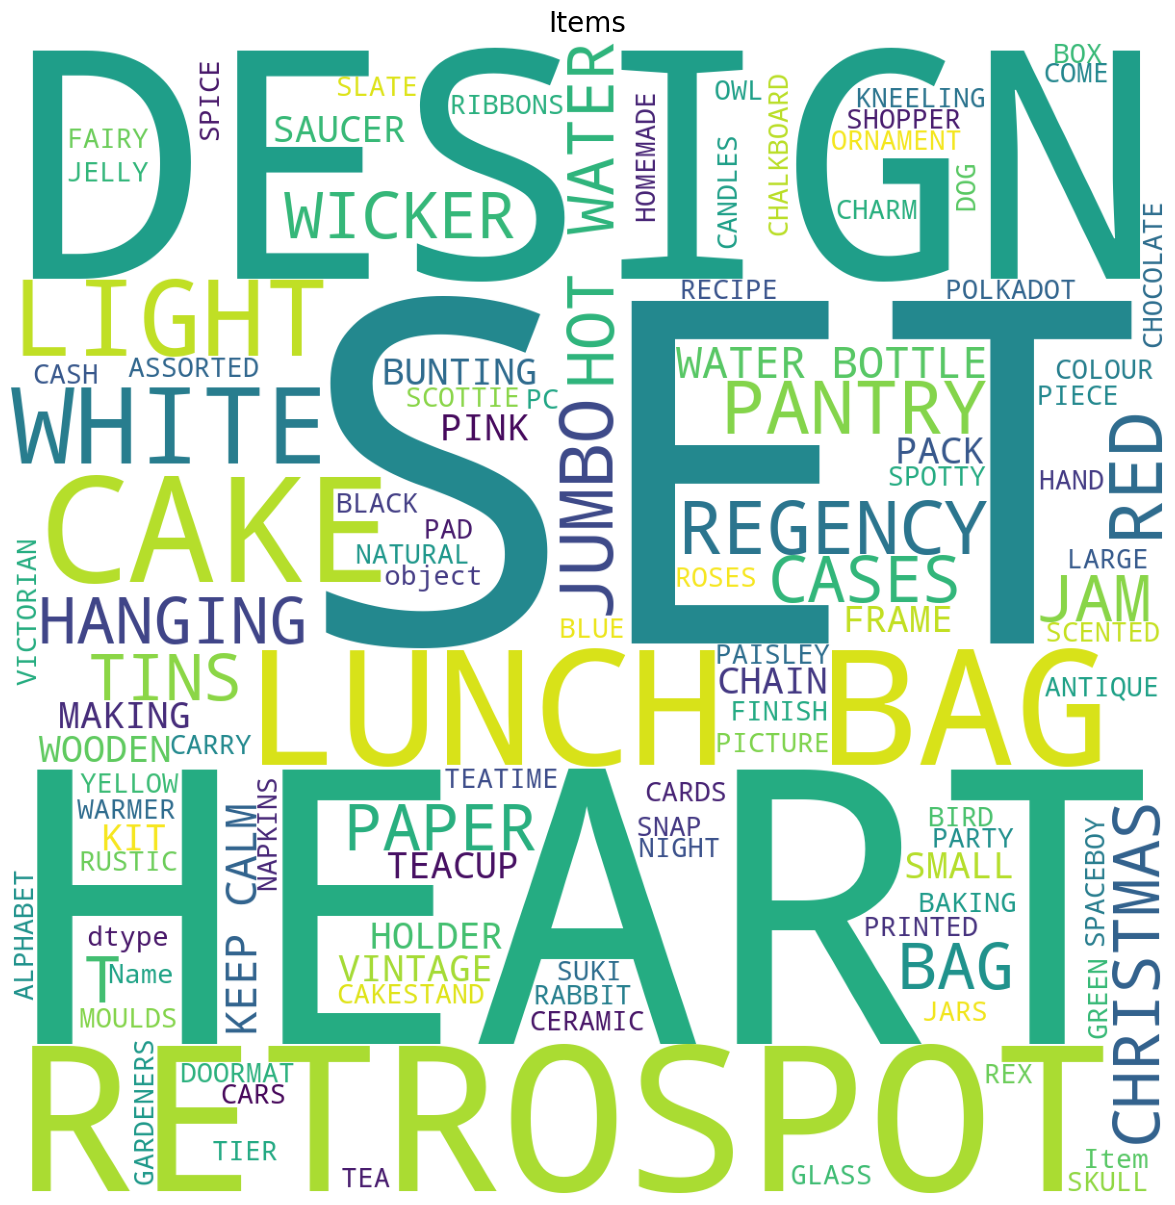

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(item['Item']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 20)
plt.show()

In [175]:
fig = px.treemap(item, path=['Item'], values='Count')
fig.show()

C:\Users\USER\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\USER\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



## Apriori Implementation

In [154]:
from mlxtend.frequent_patterns import apriori, association_rules

In [196]:
cust_level = df[["CustomerID", "Description"]].sort_values(by = "CustomerID", ascending = False) ## Selecting only required variables for modelling
cust_level['Description'] = cust_level['Description'].str.strip() # Removing white spaces if any
cust_level.head()

CustomerID                     Description
357882  18287.0     CHRISTMAS TREE HANGING SILVER 
183242  18287.0     SMALL PURPLE BABUSHKA NOTEBOOK
183244  18287.0     SMALL YELLOW BABUSHKA NOTEBOOK
183245  18287.0     LARGE YELLOW BABUSHKA NOTEBOOK
183246  18287.0     LARGE PURPLE BABUSHKA NOTEBOOK

In [177]:
transactions = [a[1]['Description'].tolist() for a in list(cust_level.groupby(['CustomerID']))] ## Combing all the items in list format for each cutomer

C:\Users\USER\AppData\Local\Temp\ipykernel_6536\1472369653.py:1: FutureWarning:

In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.



In [198]:
from apyori import apriori ## Importing apriori package
rules = apriori(transactions = transactions, min_support = 0.005, min_confidence = 0.08, min_lift = 3, min_length = 2, max_length = 2) ## Model Creation
results = list(rules) ## Storing results in list format for better visualisation

## Results Customization

In [183]:
## Creating user-defined function for arranging the results obtained from model into readable format
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [184]:
resultsinDataFrame.nlargest(n=10, columns="Lift") ## Showing best possible scenarios

Left Hand Side                      Right Hand Side  \
47076  PANTRY HOOK BALLOON WHISK        PANTRY HOOK TEA STRAINER              
48084  PARTY PIZZA DISH BLUE POLKADOT   PARTY PIZZA DISH PINK POLKADOT        
44148  MIRRORED WALL ART GENTS          MIRRORED WALL ART LADIES              
23630  ENAMEL PINK COFFEE CONTAINER     ENAMEL PINK TEA CONTAINER             
8148   BICYCLE SAFTEY WALL ART          DOG LICENCE WALL ART                  
10060  BLUE VICTORIAN FABRIC OVAL BOX   RED VICTORIAN FABRIC OVAL BOX         
44811  ORIGAMI ROSE INCENSE/CANDLE SET  ORIGAMI SANDLEWOOD INCENSE/CAND SET   
57491  SILK PURSE BABUSHKA BLUE         SILK PURSE BABUSHKA RED               
18950  COFFEE MUG BLUE PAISLEY DESIGN   COFFEE MUG PINK PAISLEY DESIGN        
48085  PARTY PIZZA DISH PINK POLKADOT   PARTY PIZZA DISH RED RETROSPOT        

        Support  Confidence        Lift  
47076  0.005316  0.840000    138.250000  
48084  0.005570  0.880000    128.740741  
44148  0.005823  0.793103    125.310345  
23630  0.005823  0.766667    108.154762  
8148   0.005570  0.611111    92.841880   
10060  0.005823  0.821429    90.128968   
44811  0.005823  0.718750    88.720703   
57491  0.005316  0.636364    83.787879   
18950  0.005823  0.638889    81.406810   
48085  0.005063  0.740741    79.079079

In [199]:
fig=px.scatter(resultsinDataFrame['Support'], resultsinDataFrame['Confidence'])
fig.update_layout(
    xaxis_title="support",
    yaxis_title="confidence",
   
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    title=('Support vs Confidence')
    
)

fig.show()

C:\Users\USER\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\USER\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [200]:
fig=px.scatter(resultsinDataFrame['Support'], resultsinDataFrame['Lift'])
fig.update_layout(
    xaxis_title="support",
    yaxis_title="lift",
   
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    title=('Support vs Confidence')
    
)

fig.show()

C:\Users\USER\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\USER\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



Text(0.5, 1.0, 'lift vs Confidence')

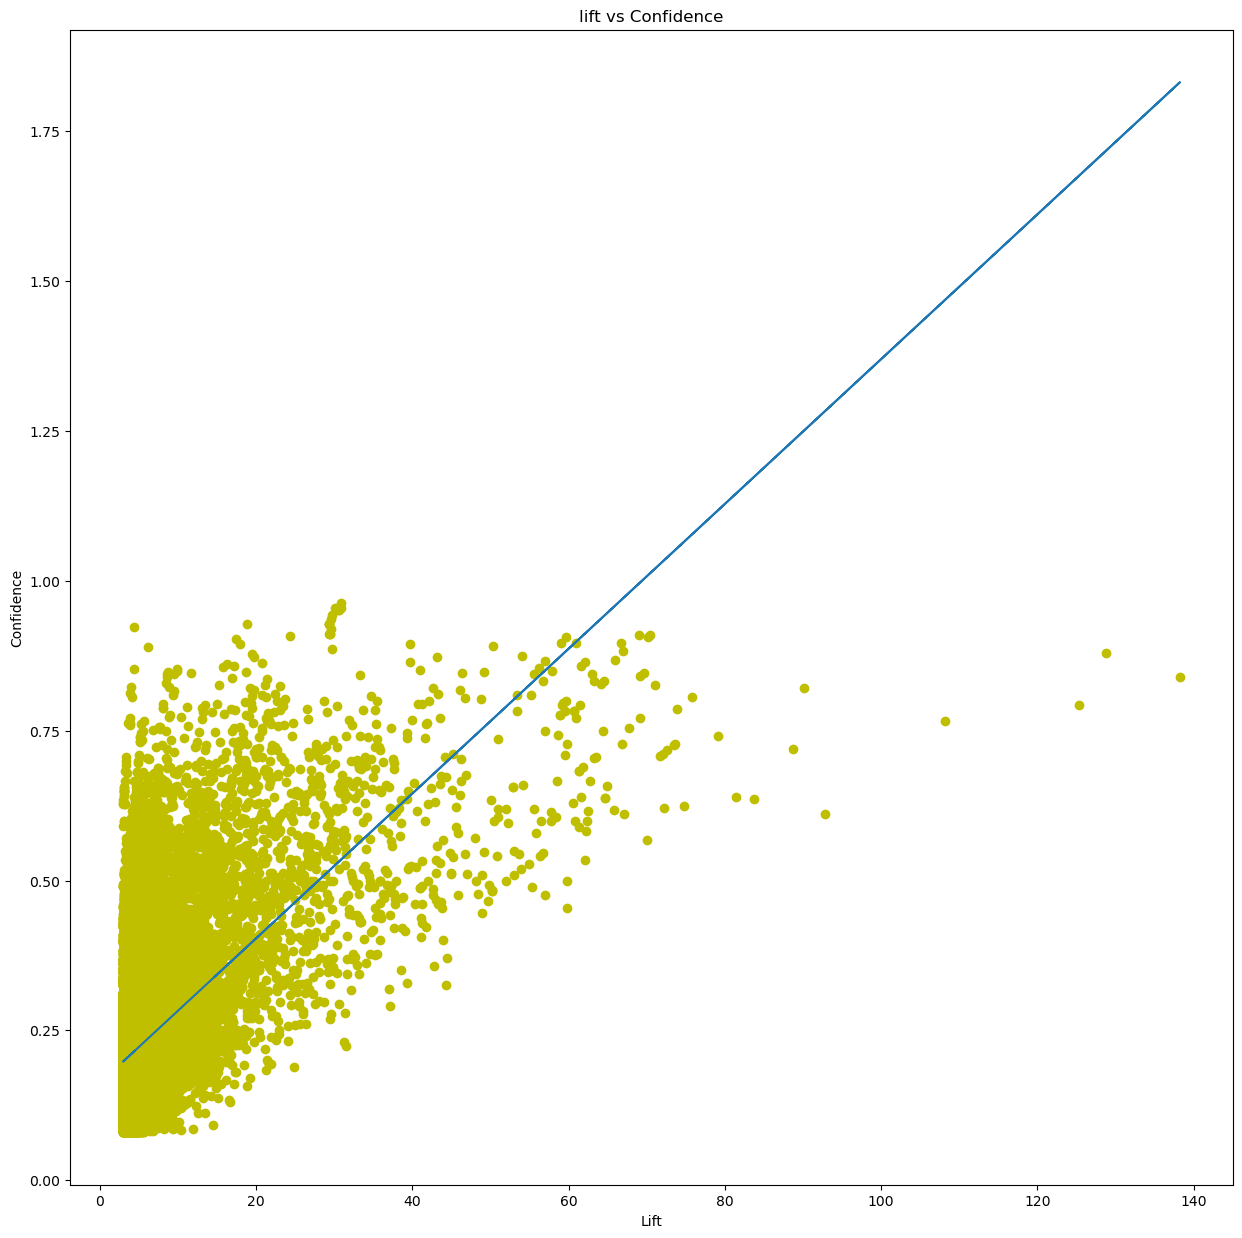

In [201]:
fit = np.polyfit(resultsinDataFrame['Lift'], resultsinDataFrame['Confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(resultsinDataFrame['Lift'], resultsinDataFrame['Confidence'], 'yo', resultsinDataFrame['Lift'], 
fit_fn(resultsinDataFrame['Lift']))
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('lift vs Confidence')

# THANK YOU